### JEWELRY PRICE OPTIMIZATION PROJECT

This Machine Learning project will be carried out using the CRISP-DM Methodolody


## 1. BUSINESS UNDERSTANDING

Gemineye is a high-end jewelry brand known for its quality and innovation. With a global presence and a diverse customer base, the company has built a strong reputation for craftsmanship and exclusive designs. However, setting the right prices for its jewelry remains a challenge. Currently, the pricing decisions are made manually, which can be slow and may not always reflect the latest market trends or customer preferences. To stay competitive and maximize revenue, Genineye needs a smarter, more data-driven approach to pricing.

##### Business Problem:
- The company struggles to set optimal prices that attract price-sensitive customers without sacrificing profit margins.
- Manual pricing adjustments are inefficient and often inconsistent across regions and product lines.
- Rapid changes in market trends, customer demand and competitive actions make it difficult to respond quickly.
- A lack of predictive insights into demand and price elasticity restricts effective decision-making.

##### Goals and Objectives:
- Develop a machine learning-based pricing system that can recommend the best prices for jewelry products
- Enable the company to adjust prices dynamically in response to market conditions.
- Maximize revenue while maintaining a good customer experience.
- Automate the pricing process to reduce manual effort and improve consistency across regions.
- Gain deeper insights into customer preferences and demand patterns to inform strategic decisions.

##### Stakeholders:
- Business Leaders
- Marketing and Sales Team
- Data Science and IT Teams
- Customers


## 2. DATA UNDERSTANDING & PREPARATION

#### EXPLORATORY DATA ANALYSIS

In [1]:
# import libraries to work with
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization theme
sns.set()

In [2]:
# load the dataset
df = pd.read_csv(r"C:\Users\User\Desktop\price optimization\data\Jewelry_Dataset.csv")
df

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.000000e+00,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.000000e+00,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.000000e+00,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.000000e+00,102.27,1.515916e+18,NaN,red,gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95905,2021-12-01 09:47:37 UTC,2719016587653808559,1515966223597820877,1,NaN,0.00,1.515916e+18,NaN,NaN,NaN,NaN,NaN,NaN
95906,2021-12-01 09:50:37 UTC,2719018098886705639,1956663830729720074,1,1.806829e+18,NaN,0.000000e+00,229.99,1.515916e+18,NaN,red,gold,NaN
95907,2021-12-01 09:52:06 UTC,2719018846999544322,1956663848219968336,1,1.806829e+18,jewelry.earring,1.000000e+00,630.00,1.515916e+18,f,white,gold,diamond
95908,2021-12-01 09:55:35 UTC,2719020596963836492,1835566854106513435,1,1.806829e+18,jewelry.earring,0.000000e+00,83.42,1.515916e+18,NaN,white,gold,fianit


In [3]:
# Take a look at the first 5 rows
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


The dataset does not include column names and this will be fixed by using the column names provided in the data dictionary

In [4]:
# Include column names
df.columns = [
    "Order_Datetime",
    "Order ID",
    "Product_ID",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem"]


In [5]:
# check if column names has been added
df.head(2)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [6]:
# look at the number of rows and columns
df.shape

(95910, 13)

In [7]:
# calculate the number of null values
df.isnull().sum()

Order_Datetime        0
Order ID              0
Product_ID            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

The dataset contains lots of missing values will be treated subsequently

In [8]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [9]:
# convert the datetime column to date datatype
df['Order_Datetime'] =pd.to_datetime(df['Order_Datetime'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_Datetime  95910 non-null  datetime64[ns, UTC]
 1   Order ID        95910 non-null  int64              
 2   Product_ID      95910 non-null  int64              
 3   SKU_Quantity    95910 non-null  int64              
 4   Category_ID     90558 non-null  float64            
 5   Category        85977 non-null  object             
 6   Brand_ID        91125 non-null  float64            
 7   Price_USD       90558 non-null  float64            
 8   User_ID         90558 non-null  float64            
 9   Target_Gender   47743 non-null  object             
 10  Main_Color      88250 non-null  object             
 11  Main_Metal      90448 non-null  object             
 12  Main_Gem        61852 non-null  object             
dtypes: datetime64[ns, UTC](1), floa

In [11]:
df.head()

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31+00:00,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [12]:
# get the number of unique values (feature cardinality)
df.nunique()

Order_Datetime    74504
Order ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

2589

The dataset contains 95,910 rows and 13 columns. It includes a mix of data types like objects, integers and floats. After taking a quick look, you can see that some columns have missing values and there are over 2,000 duplicate entries which are issues that have to be fixed going forward.

In [14]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [15]:
# get counts of unique observations for each category variable
distinct_values=  df.select_dtypes(['object']).columns
for i in range(len(distinct_values)):
    print(df[distinct_values[i]].value_counts())

jewelry.earring     29047
jewelry.ring        26025
jewelry.pendant     13083
jewelry.bracelet     6129
0.00                 4311
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category, Length: 218, dtype: int64
f    46687
m      359
Name: Target_Gender, dtype: int64
red              67909
white            14755
yellow            3322
unknown-color       56
black                2
Name: Main_Color, dtype: int64
gold        86618
silver       1362
platinum        2
Name: Main_Metal, dtype: int64
diamond                28950
fianit                 11935
topaz                   6260
pearl                   3593
garnet                  2680
sapphire                1854
amethyst                1616
mix                     1462
emerald                  828
quartz                   530
amber                    226
spinel                   156
ruby                     149
quartz_s

From the number of unique values in the categorical variables, Category has 218 unique values and it is subject to more check and analysis

In [16]:
# Get the proper unique categories of our data
df["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

There seems to be some invalid data in the category column which dont make sense. To properly look at the category distribution, we will have to eliminate these invalid data.

In [17]:
# Extract the actual categories 
categories = df["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [18]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [19]:
# Percentage of missing values in the original data
100 * df.isnull().sum() / len(df)

Order_Datetime     0.000000
Order ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.606455
Category          10.541036
Brand_ID           5.009591
Price_USD          5.606455
User_ID            5.606455
Target_Gender     49.586910
Main_Color         7.797816
Main_Metal         5.721113
Main_Gem          34.756379
dtype: float64

In [27]:
# Extract the data containing the actual categories
df1 = df.loc[df["Category"].isin(categories)]
df1.head(3)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [28]:
# Compared to percentage of missing values in the real_categories data
100 * df1.isnull().sum() / len(df)

Order_Datetime     0.000000
Order ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           3.609048
Price_USD          0.000000
User_ID            0.000000
Target_Gender     36.833082
Main_Color         2.009194
Main_Metal         0.092155
Main_Gem          19.378275
dtype: float64

It is good to note that majority of the corruption in the data are a result of errors in the jewelry category as the percentage of missing values reduces compared to the real data.

In [29]:
# Lets check the number of missing values and finally deal with it
df1.isnull().sum()

Order_Datetime        0
Order ID              0
Product_ID            0
SKU_Quantity          0
Category_ID           0
Category              0
Brand_ID           3368
Price_USD             0
User_ID               0
Target_Gender     34373
Main_Color         1875
Main_Metal           86
Main_Gem          18084
dtype: int64

In [30]:
# fill null values with previous values
df1 = df1.fillna(method = 'ffill')
df1.isnull().sum()

Order_Datetime    0
Order ID          0
Product_ID        0
SKU_Quantity      0
Category_ID       0
Category          0
Brand_ID          0
Price_USD         0
User_ID           0
Target_Gender     0
Main_Color        0
Main_Metal        0
Main_Gem          0
dtype: int64

In [31]:
# Lets get the info of our cleaned dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78087 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Order_Datetime  78087 non-null  datetime64[ns, UTC]
 1   Order ID        78087 non-null  int64              
 2   Product_ID      78087 non-null  int64              
 3   SKU_Quantity    78087 non-null  int64              
 4   Category_ID     78087 non-null  float64            
 5   Category        78087 non-null  object             
 6   Brand_ID        78087 non-null  float64            
 7   Price_USD       78087 non-null  float64            
 8   User_ID         78087 non-null  float64            
 9   Target_Gender   78087 non-null  object             
 10  Main_Color      78087 non-null  object             
 11  Main_Metal      78087 non-null  object             
 12  Main_Gem        78087 non-null  object             
dtypes: datetime64[ns, UTC](1), floa

The data is completely clean of errors now, with the right data types and it consists of 78,087 rows and 13 columns

In [32]:
# statistical analysis of the dataset
df1.describe(include="all", datetime_is_numeric=True)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
count,78087,7.808700e+04,7.808700e+04,78087.0,7.808700e+04,78087,78087.000000,78087.000000,7.808700e+04,78087,78087,78087,78087
unique,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,2,4,3,30
top,NaN,NaN,NaN,NaN,NaN,jewelry.earring,NaN,NaN,NaN,f,red,gold,diamond
freq,NaN,NaN,NaN,NaN,NaN,29047,NaN,NaN,NaN,77652,60832,76906,37281
mean,2020-12-27 07:00:32.357217024+00:00,2.473234e+18,1.825199e+18,1.0,1.806160e+18,NaN,0.636470,353.715579,1.512538e+18,NaN,NaN,NaN,NaN
min,2018-12-02 13:53:42+00:00,1.925511e+18,1.313551e+18,1.0,1.313678e+18,NaN,0.000000,0.990000,1.313554e+18,NaN,NaN,NaN,NaN
25%,2020-08-07 05:42:01+00:00,2.370276e+18,1.515966e+18,1.0,1.806829e+18,NaN,0.000000,143.700000,1.515916e+18,NaN,NaN,NaN,NaN
50%,2021-02-19 03:03:16+00:00,2.512252e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000,253.290000,1.515916e+18,NaN,NaN,NaN,NaN
75%,2021-08-04 07:10:38+00:00,2.632689e+18,1.956664e+18,1.0,1.806829e+18,NaN,1.000000,417.670000,1.515916e+18,NaN,NaN,NaN,NaN
max,2021-12-01 09:59:07+00:00,2.719022e+18,2.541962e+18,1.0,1.806829e+18,NaN,5.000000,34448.600000,1.554297e+18,NaN,NaN,NaN,NaN


- From the statistical summary, Price_USD is the only numerical column that makes sense. It has an minimum value of 0.99 and maximum of 30000. It is positively skewed as the average value of 353 is higher than the median of 253.
- Category has jewelry.earring as the most bought product.
- Target_Gender is mostly made up of Females
- Red seems to be the most frequent main_color.
- Gold is the most frequent main_metal.
- Diamond occurs most for main_gem.
- Features like Order_ID, Product_ID, SKU_Quantity, Category_ID, Brand_ID and User_ID don't seem to be useful in this dataset and will likely be removed.

### VISUALIZATIONS

###### UNIVARIATE DISTRIBUTIONS

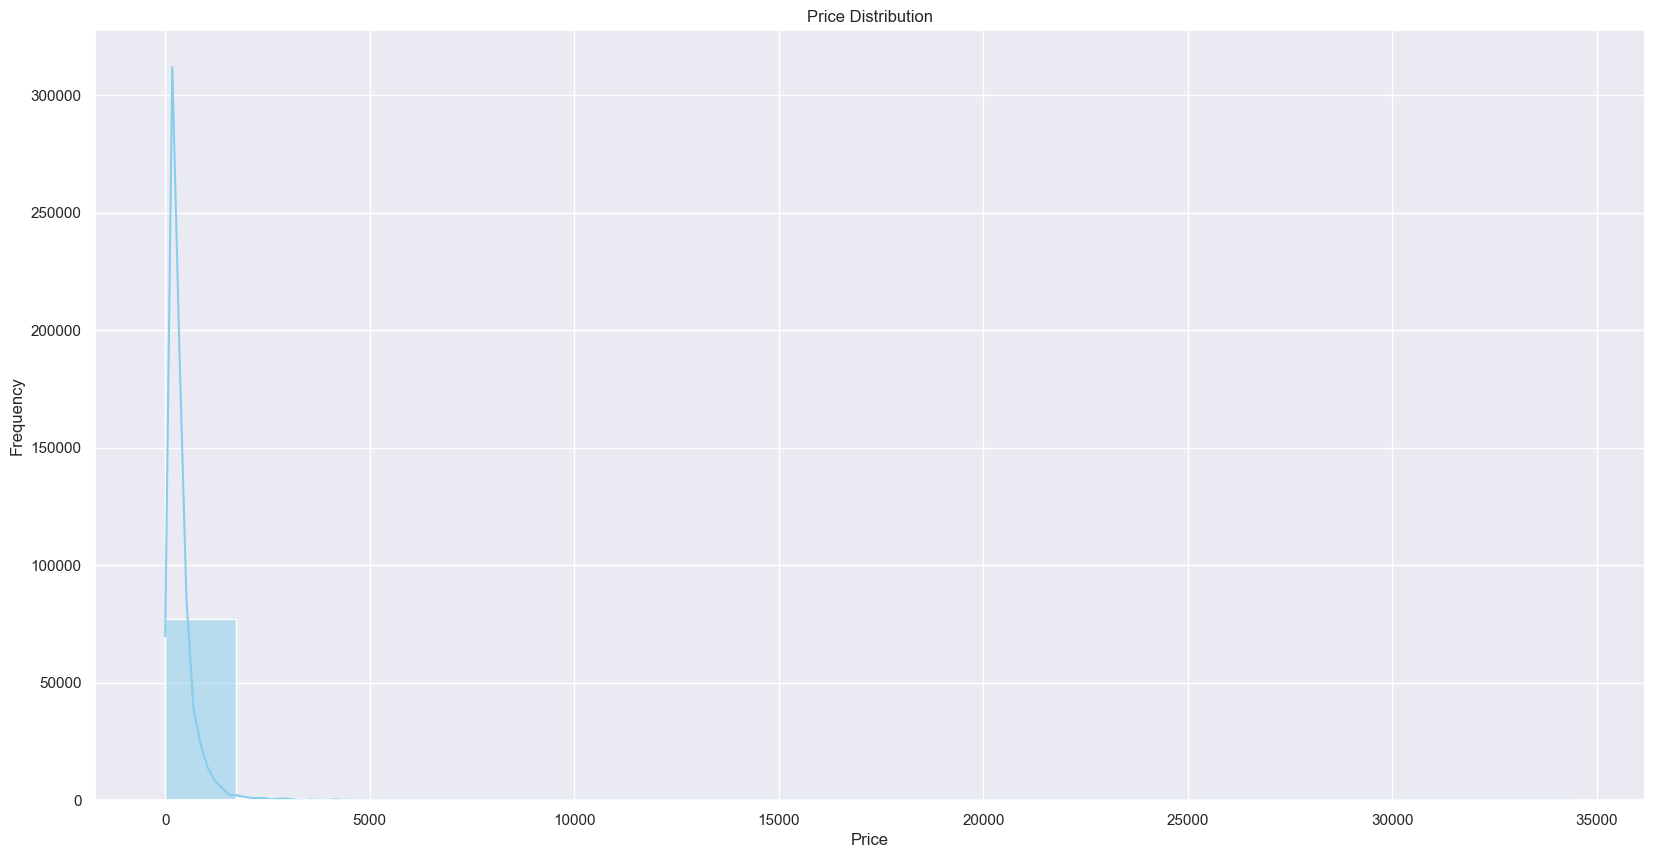

In [33]:
# Price Distribution
plt.figure(figsize=(20,10))

sns.histplot(data=df1, x='Price_USD', bins=20, color='skyblue', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This suggests that while most items are priced on the lower end, a few high-priced outliers are pulling the average upward. The histogram shows this positive skew, with most prices clustered low and a long tail toward higher values. From a business perspective, this indicates an opportunity to review the pricing strategy. The majority of products appear to be affordably priced, which may appeal to a broader market, but the presence of high-priced items suggests a potential premium segment. It may be worth analyzing whether these high-priced items are generating enough value or if pricing can be optimized to improve sales across different customer segments.

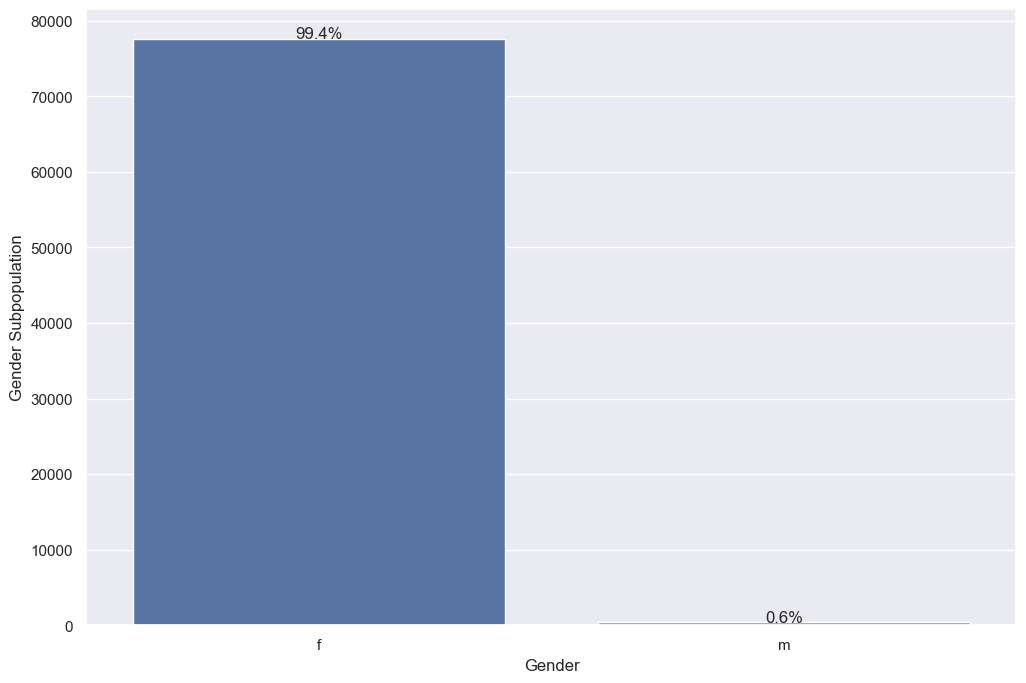

In [34]:
# Target_Gender Analysis
plt.figure(figsize = (12, 8))

# Create the countplot
ax = sns.countplot(data=df1, x="Target_Gender")

# Calculate percentages
total = len(df1)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percent, ha='center', fontsize=12)

# create labels

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show()

The Target_Gender distribution shows a significant skew, with females making up 99.4% of the population. This indicates that most purchases are made by female customers. In conclusion, Gemineye may benefit from developing marketing strategies or product lines that better engage male customers, helping to tap into a currently underrepresented segment. This skew will be handles in the Data modeling stage

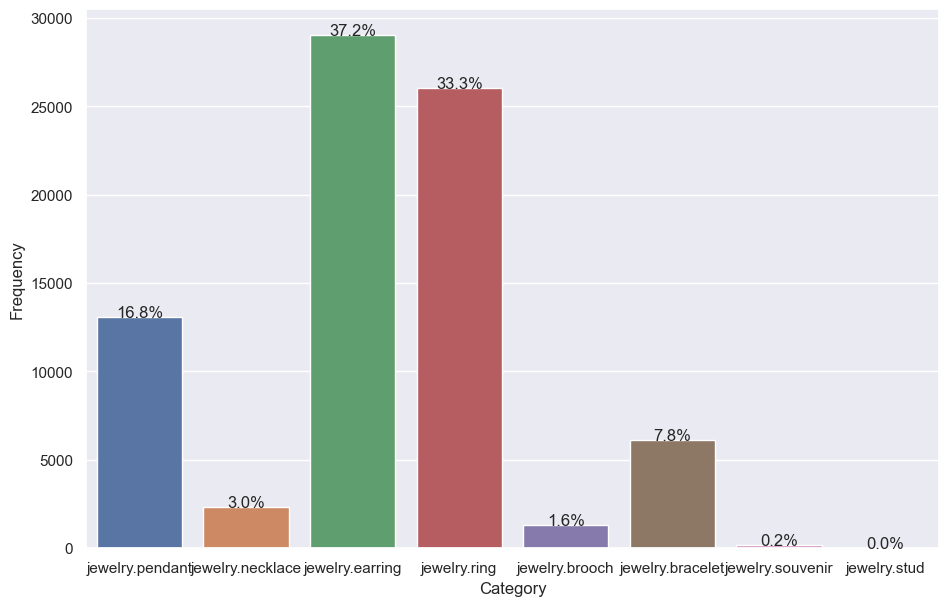

In [35]:
# Jewelry Category Analysis
plt.figure(figsize = (11, 7))

# Create the countplot
ax = sns.countplot(data=df1, x="Category")

# Calculate percentages
total = len(df1)
for p in ax.patches:
    count = p.get_height()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 5, percent, ha='center', fontsize=12)

# create labels

plt.xlabel("Category")
plt.ylabel("Frequency")

plt.show()

The jewelry category distribution reveals that earrings (37.2%) and rings (33.3%) are the dominant product types, together accounting for over 70% of total sales. Pendants also contribute a moderate share at 16.8%, while categories like bracelets (7.8%), necklaces (3.0%), and brooches (1.6%) have relatively lower representation. Souvenirs (0.2%) and studs (0%) show minimal or no sales activity.

This distribution suggests that Gemineye’s core demand lies in earrings and rings. To drive growth, the company could focus on expanding these popular categories while also exploring strategies to boost visibility and appeal for underperforming segments like bracelets, necklaces, and brooches.

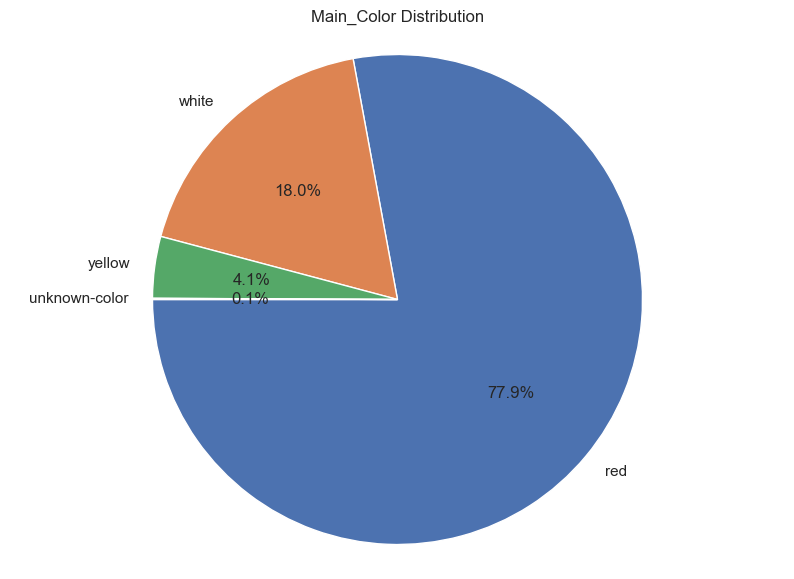

In [36]:
# Main_Color Analysis
# Count the values and calculate percentages
color_counts = df1['Main_Color'].value_counts()
color_percent = color_counts / color_counts.sum() * 100

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(color_percent, labels=color_percent.index, autopct='%1.1f%%', startangle=180)
plt.title('Main_Color Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The main color distribution shows that most products are red, making it the clear favorite in the lineup. White comes in a distant second and yellow appears only rarely. There are a few entries with unknown colors, which might just be data entry issues. Overall, it’s clear that red is the dominant color in the collection.

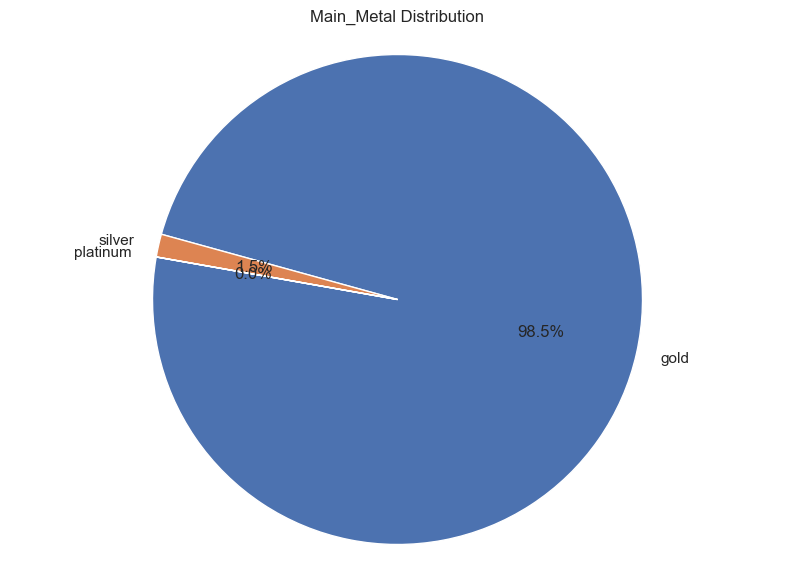

In [37]:
# Main_Metal Analysis
# Count the values and calculate percentages
color_counts = df1['Main_Metal'].value_counts()
color_percent = color_counts / color_counts.sum() * 100

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(color_percent, labels=color_percent.index, autopct='%1.1f%%', startangle=170)
plt.title('Main_Metal Distribution')
plt.axis('equal') 
plt.show()

The pie chart shows that gold overwhelmingly dominates as the main metal used in the products, with silver making up a very small portion. Platinum is virtually absent. This suggests a strong focus on gold-based jewelry, which could reflect customer preference, brand identity, or pricing strategy.

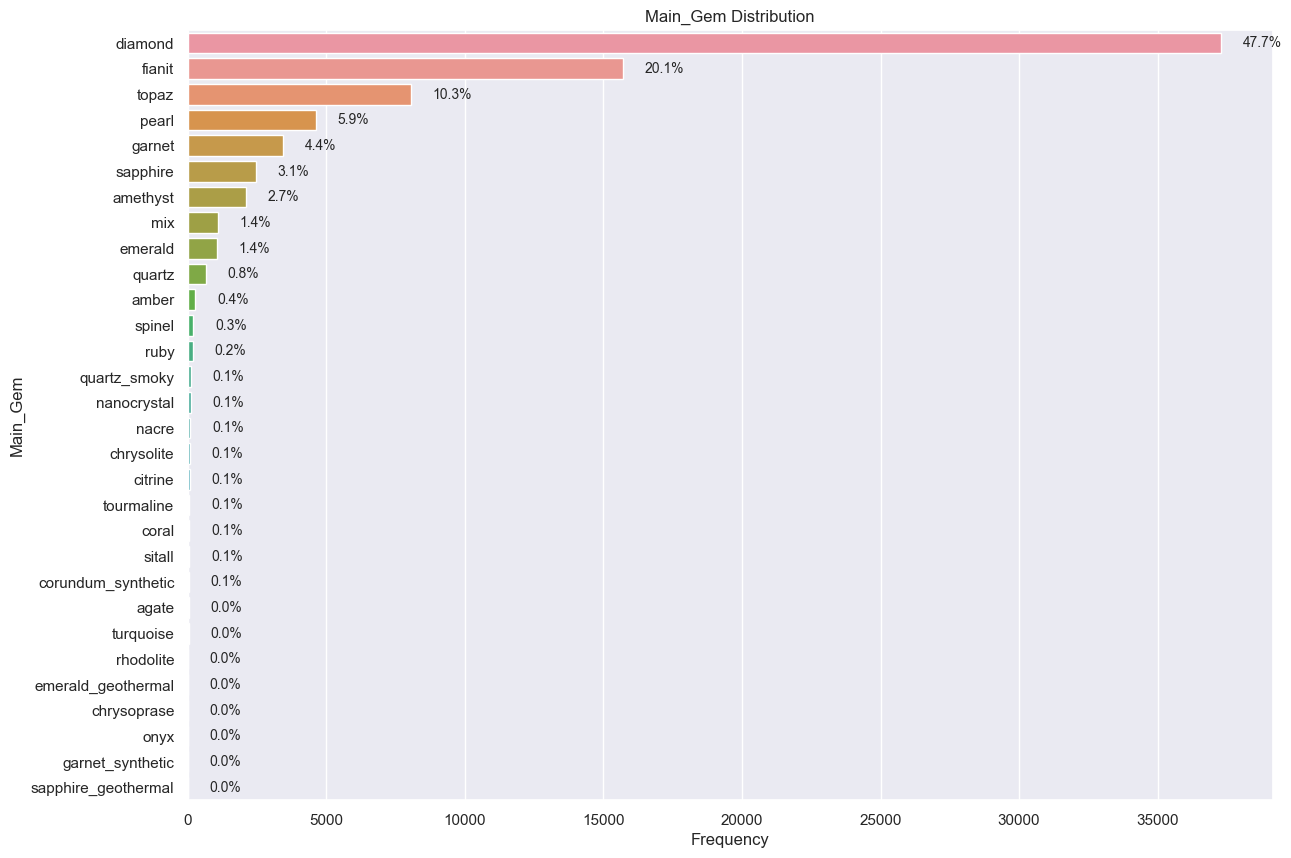

In [38]:
# Main_gem Analysis
plt.figure(figsize=(14, 10))  # Bigger figure for more categories

# Horizontal countplot
ax = sns.countplot(data=df1, y="Main_Gem", order=df1['Main_Gem'].value_counts().index)

total = len(df1)
for p in ax.patches:
    count = p.get_width()
    percent = f'{100 * count / total:.1f}%'
    x = p.get_width() + total * 0.01  
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, percent, va='center', fontsize=10)

plt.ylabel("Main_Gem")
plt.xlabel("Frequency")
plt.title("Main_Gem Distribution")

plt.show()

The main gem distribution shows that diamonds are by far the most common gemstone used, followed by fianit and topaz. Pearls, garnets, sapphires and amethysts also appear but in much smaller amounts. Other gemstones are rarely used, suggesting the product line is heavily centered around a few popular stones, particularly diamonds.

##### BIVARIATE ANALYSIS

In [39]:
# Sales trend over time
# First extract year and month into new columns
df1['Order_year'] = df1['Order_Datetime'].dt.year
df1['Order_month'] = df1['Order_Datetime'].dt.month_name()

In [40]:
df1.head(2)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order_year,Order_month
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,2018,December
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,2018,December


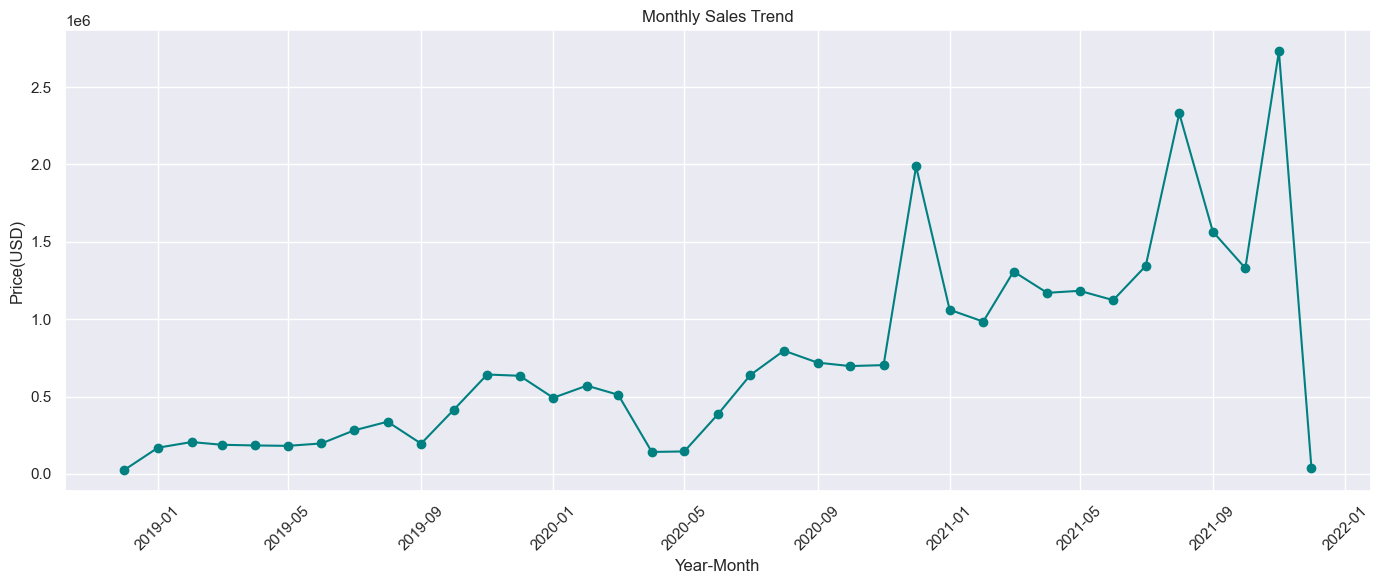

In [41]:
# Create a 'year-month' datetime column for proper sorting
df1['year_month'] = pd.to_datetime(df1['Order_year'].astype(str) + '-' + df1['Order_month'].astype(str) + '-01')

# Group by the new year-month column and sum the prices
monthly_sales = df1.groupby('year_month')['Price_USD'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['Price_USD'], marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Price(USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The sales trend shows steady growth from 2019 through 2020, with a sharp rise in 2021 marked by several spikes. This suggests increasing demand or successful campaigns during that year. However, sales drop off sharply at the end, possibly due to seasonality or missing data for 2022.

In [42]:
# lets calculate the total sales price in  each years 2019,2020,2021, 2022
total_sales_2019 = df1[df1['Order_year'] == 2019]['Price_USD'].sum()
total_sales_2020 = df1[df1['Order_year'] == 2020]['Price_USD'].sum()
total_sales_2021 = df1[df1['Order_year'] == 2021]['Price_USD'].sum()
total_sales_2022 = df1[df1['Order_year'] == 2022]['Price_USD'].sum()
total_sales = df1['Price_USD'].sum()


print(f"Total sales in 2019: ${total_sales_2019:,.2f}")
print(f"Total sales in 2020: ${total_sales_2020:,.2f}")
print(f"Total sales in 2021: ${total_sales_2021:,.2f}")
print(f"Total sales in 2022: ${total_sales_2022:,.2f}")
print(f"Total sales: ${total_sales:,.2f}")

Total sales in 2019: $3,632,538.88
Total sales in 2020: $7,790,669.39
Total sales in 2021: $16,171,275.47
Total sales in 2022: $0.00
Total sales: $27,620,588.38


Sales grew steadily from 3.6M in 2019 to 7.8M in 2020, then more than doubled to 16.2M in 2021. However, 2022 recorded no sales, which might suggest missing data or a pause in business activity.

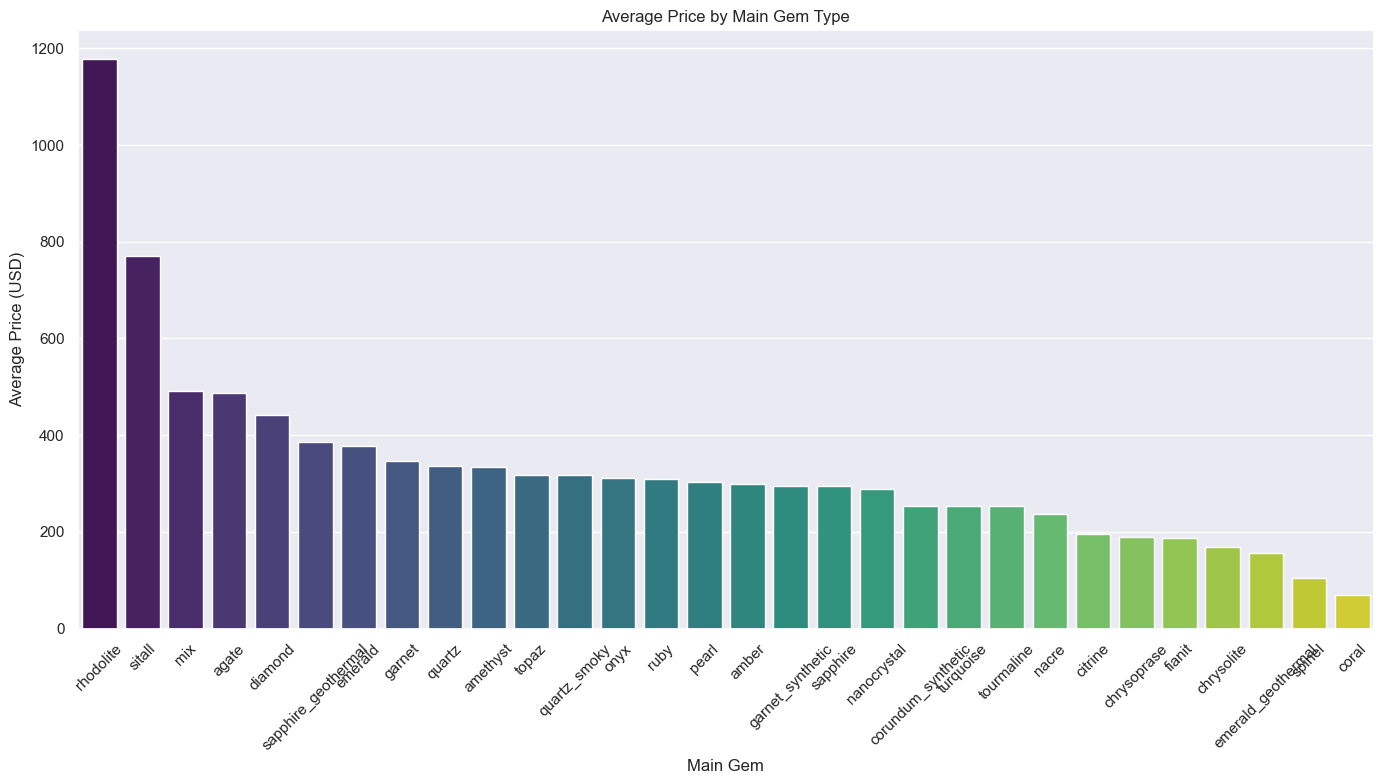

In [43]:
# Price_USD by Main_Gem
# Group by Main_Gem and calculate average price
avg_price_per_gem = df1.groupby('Main_Gem')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Main_Gem', y='Price_USD', palette='viridis')

plt.title('Average Price by Main Gem Type')
plt.xlabel('Main Gem')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The chart shows that rhodolite and sitall have the highest average prices among all gem types, indicating they may be more premium or rare in this dataset. On the other end, coral, shell and emerald are associated with the lowest average prices. Notably, popular gems like diamond, emerald and sapphire fall in the mid-to-upper price range, suggesting a balance between demand and availability. This kind of pricing insight can help in optimizing product positioning and marketing strategy for different gem types.

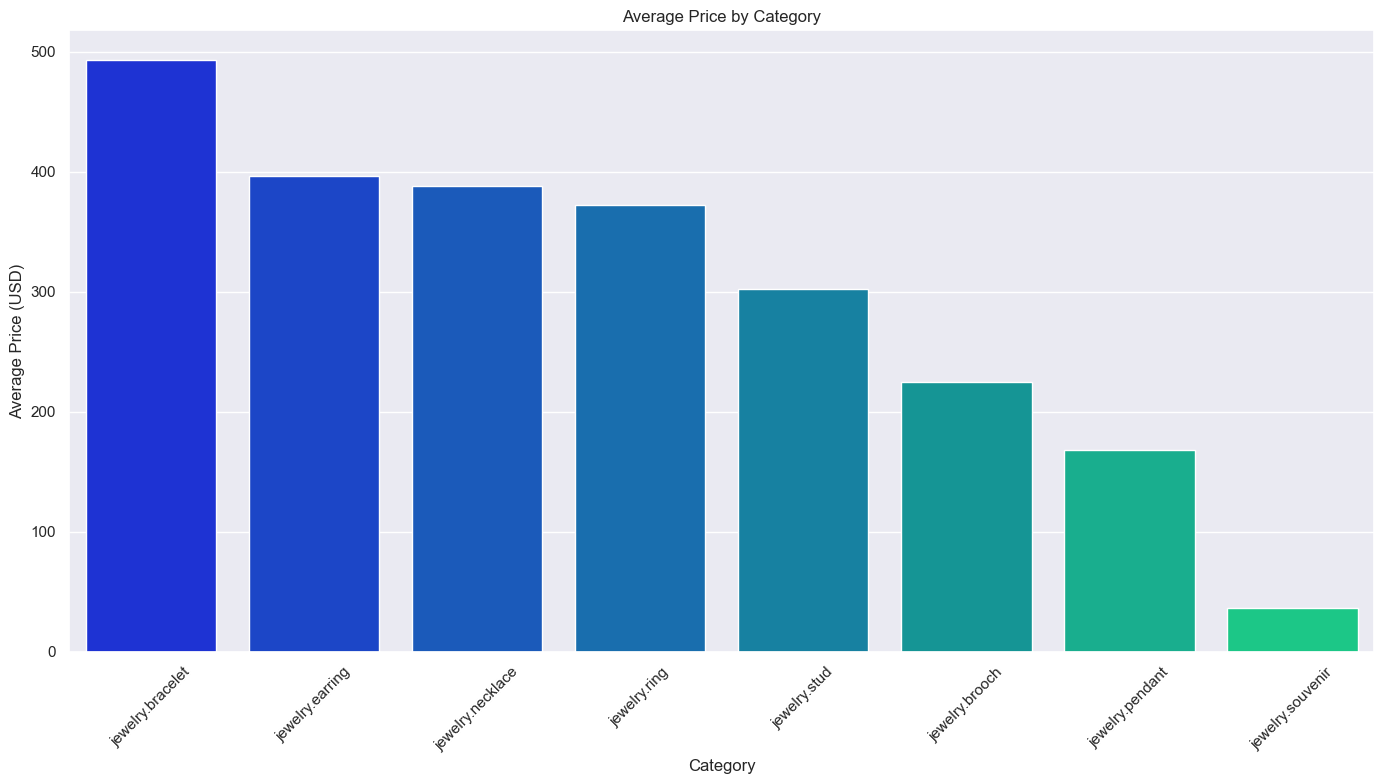

In [44]:
# Price_USD by Category
# Group by Main_Gem and calculate average price
avg_price_per_gem = df1.groupby('Category')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Category', y='Price_USD', palette='winter')

plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bracelets have the highest average price, followed closely by earrings and necklaces, suggesting they may be positioned as more premium items. On the other end, souvenirs and pendants are the most affordable and also rarely purchased, likely aimed at budget-conscious buyers or casual gifting. This gives a clear pricing ladder that can inform both marketing and inventory strategies.

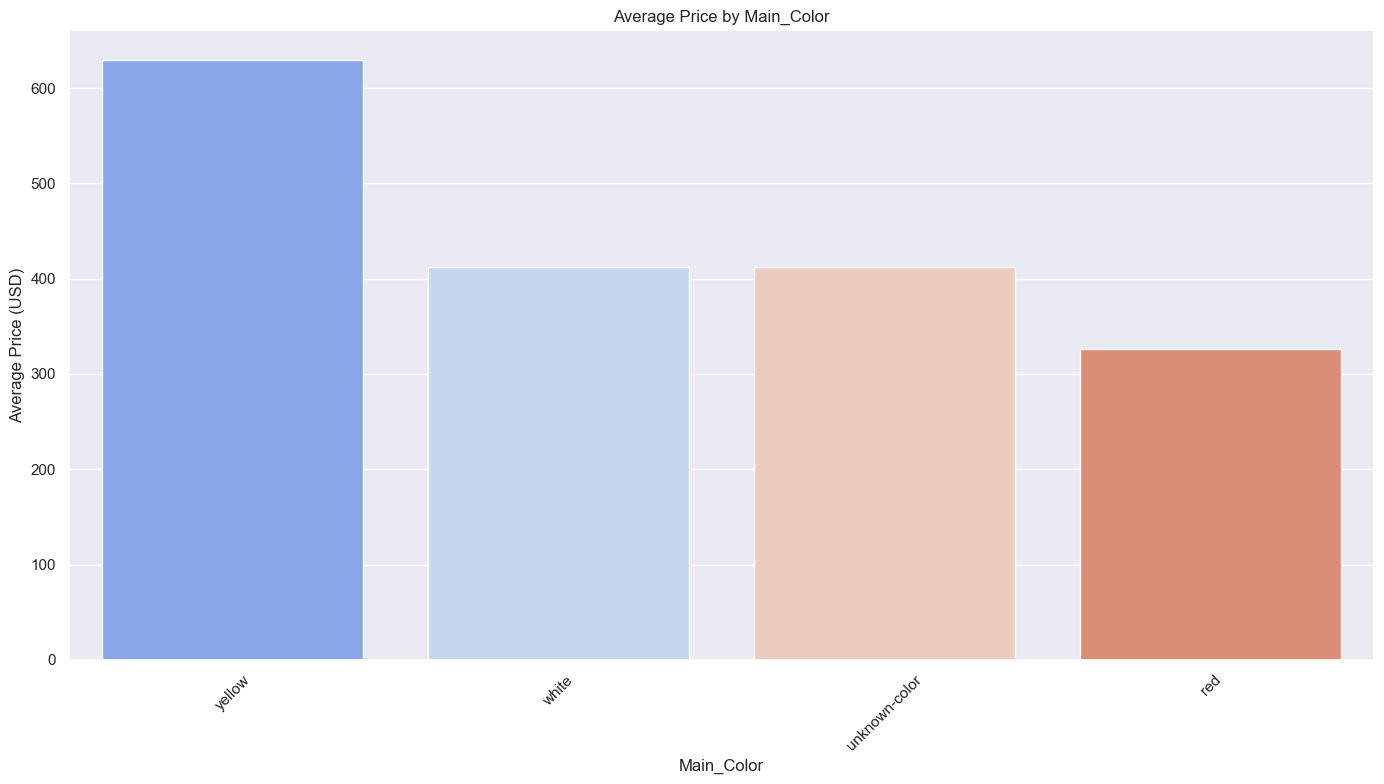

In [45]:
# Price_USD by Main_Color
# Group by Main_Gem and calculate average price
avg_price_per_gem = df1.groupby('Main_Color')['Price_USD'].mean().reset_index()

# Sort by price 
avg_price_per_gem = avg_price_per_gem.sort_values(by='Price_USD', ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_per_gem, x='Main_Color', y='Price_USD', palette='coolwarm')

plt.title('Average Price by Main_Color')
plt.xlabel('Main_Color')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Prices vary depending on the main color of the jewelry. Yellow pieces tend to be the most expensive, while white and unknown_colors fall in the middle. Red items, though the most common are priced lower. This shows that rarity matters more for price than popularity.

In [46]:
# Calculate the sum of price by main_color
sum_by_color = df1.groupby('Main_Color')['Price_USD'].sum()

print(sum_by_color)

Main_Color
red              19819848.79
unknown-color       25131.45
white             5778109.80
yellow            1997498.34
Name: Price_USD, dtype: float64


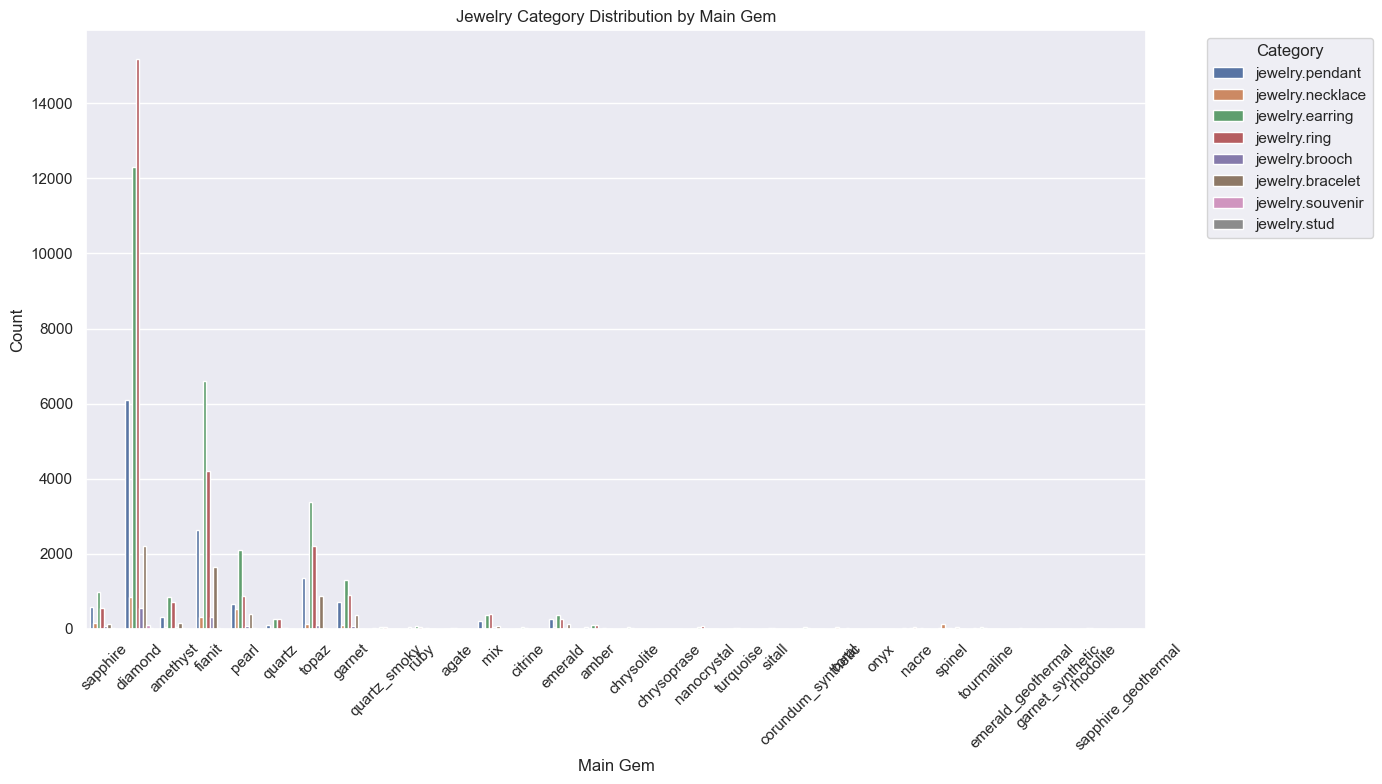

In [47]:
# Category by Main Gem
plt.figure(figsize=(14, 8))
sns.countplot(data=df1, x='Main_Gem', hue='Category')

plt.title('Jewelry Category Distribution by Main Gem')
plt.xlabel('Main Gem')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Diamonds are the most common main gem used in jewelry, with earrings and rings being particularly dominant in this category. Fanit and topaz follow, appearing across various jewelry types with earrings dominating. These trends highlight the strong preference for diamonds in high-value jewelry, while other gems serve niche markets. 


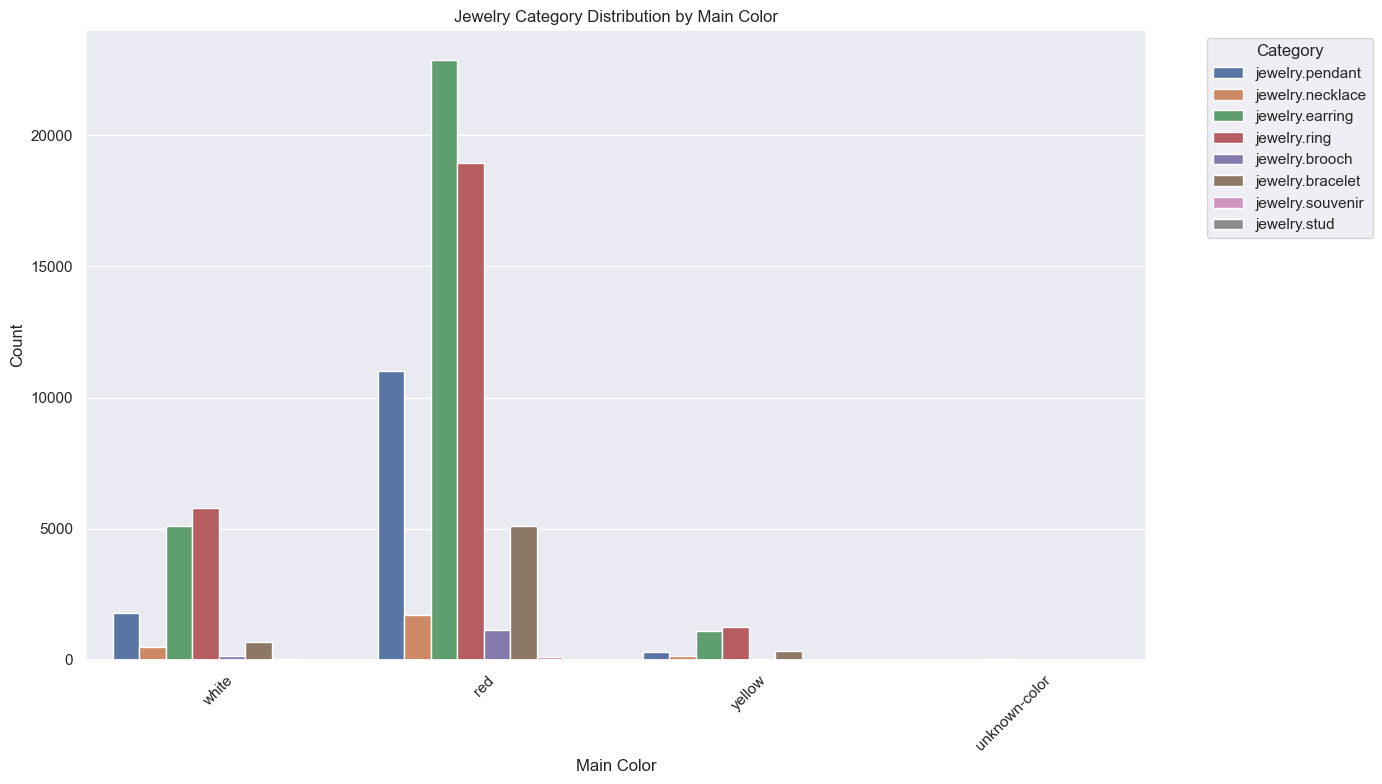

In [48]:
# Category by Main Gem
plt.figure(figsize=(14, 8))
sns.countplot(data=df1, x='Main_Color', hue='Category')

plt.title('Jewelry Category Distribution by Main Color')
plt.xlabel('Main Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The red and white jewelry dominate the market, with earrings and rings being the most common in both colors. Yellow jewelry is less frequent and this suggests that earrings and rings are consistently popular across multiple colors, whereas bracelets tend to be more color-specific.


#### MULTIVARIATE ANALYSIS

In [49]:
# Correlation of features
# Firstly, we have to encode the categorical variables
encoded, category_code = pd.factorize(df1["Category"])
df1["Category"] = encoded

In [50]:
encoded, category_code = pd.factorize(df1["Target_Gender"])
df1["Target_Gender"] = encoded

In [51]:
encoded, category_code = pd.factorize(df1["Main_Gem"])
df1["Main_Gem"] = encoded

In [52]:
encoded, category_code = pd.factorize(df1["Main_Color"])
df1["Main_Color"] = encoded

In [53]:
encoded, category_code = pd.factorize(df1["Main_Metal"])
df1["Main_Metal"] = encoded

In [54]:
df1.head(3)

,Order_Datetime,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order_year,Order_month,year_month
1,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0,2018,December,2018-12-01
2,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1,2018,December,2018-12-01
3,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,0,1,0,2,2018,December,2018-12-01


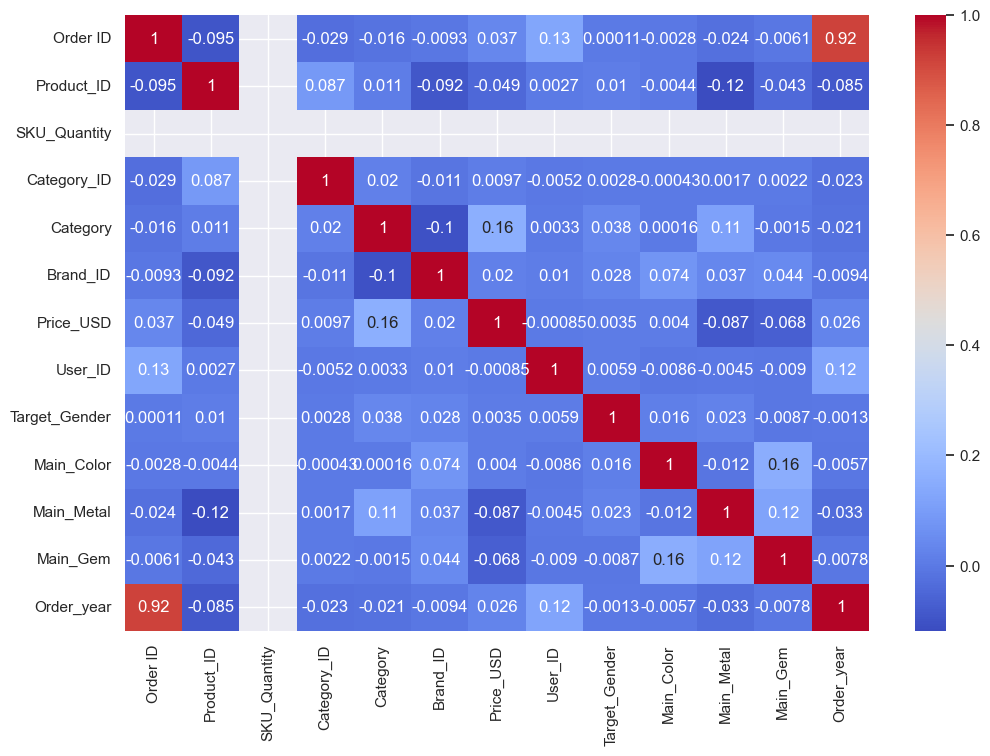

In [55]:
# plot it using a heatmap
plt.figure(figsize = [12, 8])
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap ='coolwarm');

In [56]:
df1.corr(numeric_only=True)

,Order ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem,Order_year
Order ID,1.000000,-0.095406,NaN,-0.029287,-0.015762,-0.009284,0.036856,0.128565,0.000114,-0.002800,-0.024373,-0.006082,0.917264
Product_ID,-0.095406,1.000000,NaN,0.087187,0.011173,-0.091616,-0.048904,0.002672,0.009957,-0.004418,-0.118882,-0.043106,-0.085232
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,-0.029287,0.087187,NaN,1.000000,0.019817,-0.011354,0.009681,-0.005163,0.002759,-0.000427,0.001722,0.002204,-0.023350
Category,-0.015762,0.011173,NaN,0.019817,1.000000,-0.101983,0.156557,0.003344,0.037865,0.000159,0.114240,-0.001487,-0.021186
Brand_ID,-0.009284,-0.091616,NaN,-0.011354,-0.101983,1.000000,0.020186,0.010414,0.028200,0.073695,0.037155,0.044068,-0.009440
Price_USD,0.036856,-0.048904,NaN,0.009681,0.156557,0.020186,1.000000,-0.000851,0.003536,0.003959,-0.087045,-0.067666,0.025635
User_ID,0.128565,0.002672,NaN,-0.005163,0.003344,0.010414,-0.000851,1.000000,0.005935,-0.008580,-0.004485,-0.008957,0.124574
Target_Gender,0.000114,0.009957,NaN,0.002759,0.037865,0.028200,0.003536,0.005935,1.000000,0.015879,0.023076,-0.008700,-0.001310
Main_Color,-0.002800,-0.004418,NaN,-0.000427,0.000159,0.073695,0.003959,-0.008580,0.015879,1.000000,-0.011935,0.155065,-0.005714


- Weak correlations overall: Price_USD has a slight positive correlation with Category (0.16) and Brand_ID (0.1), suggesting that certain categories and brands might influence price.

- Small negative correlations: There's a weak negative correlation with Product_ID (-0.049) and Main_Metal (-0.087), indicating metal type may slightly impact price but not significantly.

- Minimal impact from other features: Most other variables show near-zero correlation, meaning they likely don’t directly affect price in a linear manner.


In [57]:
# Remove irrelevant columns for modeling stage
remove_columns =[
    'Order_Datetime', 
    'Order ID', 
    'Product_ID',
    'Category_ID',
    'SKU_Quantity',
    'User_ID',
    'year_month', 
    'Order_year',
    'Order_month']

In [58]:
# Assign to a new variable 
df2= df1.drop(labels = remove_columns, axis=1)
df2.head(2)

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,0,1.0,54.66,0,0,0,0
2,0,0.0,88.90,0,1,0,1


In [59]:
df2.columns

Index(['Category', 'Brand_ID', 'Price_USD', 'Target_Gender', 'Main_Color',
       'Main_Metal', 'Main_Gem'],
      dtype='object')

In [60]:
# Separate target and features
X = df2.drop(labels = ['Price_USD'], axis=1)
y = df2['Price_USD']

In [61]:
X

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,0,1.0,0,0,0,0
2,0,0.0,0,1,0,1
3,1,0.0,0,1,0,2
4,2,1.0,0,1,0,2
5,2,0.0,0,1,0,1
...,...,...,...,...,...,...
95900,3,0.0,0,1,0,1
95903,2,0.0,0,1,0,2
95907,2,1.0,0,0,0,1
95908,2,0.0,0,0,0,3


In [62]:
y

1         54.66
2         88.90
3        417.67
4        102.27
5        150.55
          ...  
95900    145.62
95903    301.23
95907    630.00
95908     83.42
95909     97.12
Name: Price_USD, Length: 78087, dtype: float64

In [63]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [64]:
# Create train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. DATA MODELING